<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Well-documented, Demonstration Python Workflows 

### Linear Regression

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

By Michael J. Pyrcz <br />
&copy; Copyright 2024. 

This is a tutorial for / demonstration of **Linear Regression**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Linear Regression](https://youtu.be/0fzbyhWiP84)
* [Ridge Regression](https://youtu.be/pMGO40yXZ5Y?si=ygJAheyX-v2BmSiR)
* [LASSO Regression](https://youtu.be/cVFYhlCCI_8?si=NbwIDaZj30vxezn2)
* [Norms](https://youtu.be/JmxGlrurQp0?si=vuF1TXDbZkyRC1j-)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Linear Regression

Here's a simple workflow, demonstration of linear regression for machine learning-based predictions. Why start with linear regression?

* Linear regression is the simplest parametric predictive machine learning model
* We learn about training machine learning models with an analytical solution calculated from the derivatiave of training MSE
* Get's us started with the concepts of loss functions and norms
* We have access to analytics experessions for confidence intervals for model undertainty and hypothesis tests for parameter significance

Here's some basic details about linear regression. 

#### Linear Regression

Linear regression for prediction. Here are some key aspects of linear regression:

**Parametric Model**

This is a parametric predictive machine learning model, we accept an a prior assumption of linearity and then gain a very low parametric representation that is easy to train without a onerous amount of data.

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.
* the parametric model takes the form of: 

$$
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
$$

**Least Squares**

The analytical solution for the model parameters, $b_1,\ldots,b_m,b_0$, is available for the L2 norm loss function, the errors are summed and squared known a least squares.
* we minize the error, residual sum of squares (RSS) over the training data: 

$$
RSS = \sum_{i=1}^n \left(y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0) \right)^2
$$

where $y_i$ is the actual response feature values and $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$ are the model predictions, over the $\alpha = 1,\ldots,n$ training data.

* this may be simplified as the sum of square error over the training data, 

\begin{equation}
\sum_{i=1}^n (\Delta y_i)^2
\end{equation}

where $\Delta y_i$ is actual response feature observation $y_i$ minus the model prediction $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$, over the $i = 1,\ldots,n$ training data.

**Assumptions**

There are important assumption with our linear regression model,
* **Error-free** - predictor variables are error free, not random variables 
* **Linearity** - response is linear combination of feature(s)
* **Constant Variance** - error in response is constant over predictor(s) value
* **Independence of Error** - error in response are uncorrelated with each other
* **No multicollinearity** - none of the features are redundant with other features 

#### Load the required libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
supress_warnings = False
import os                                                     # to set current working directory 
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if supress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')    

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Declare functions

Let's define a function to streamline the addition specified percentiles and major and minor gridlines to our plots.

In [3]:
def weighted_percentile(data, weights, perc):                 # calculate weighted percentile (iambr on StackOverflow @ https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy/32216049) 
    ix = np.argsort(data)
    data = data[ix] 
    weights = weights[ix] 
    cdf = (np.cumsum(weights) - 0.5 * weights) / np.sum(weights) 
    return np.interp(perc, cdf, data)

def histogram_bounds(values,weights,color):                   # add uncertainty bounds to a histogram          
    p10 = weighted_percentile(values,weights,0.1); avg = np.average(values,weights=weights); p90 = weighted_percentile(values,weights,0.9)
    plt.plot([p10,p10],[0.0,45],color = color,linestyle='dashed')
    plt.plot([avg,avg],[0.0,45],color = color)
    plt.plot([p90,p90],[0.0,45],color = color,linestyle='dashed')

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [4]:
#os.chdir("C:\PGE337")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

Let's load the provided multivariate, spatial dataset 'unconv_MV.csv'. This dataset has variables from 1,000 unconventional wells including:

* density ($g/cm^{3}$)
* porosity (volume %) 

Note, the dataset is synthetic.

We load it with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

In [5]:
add_error = False                                             # add random error to the response feature for testing
std_error = 1.0; seed = 71071

yname = 'Porosity'; xname = 'Density'                         # specify the predictor features (x2) and response feature (x1)
xmin = 1.0; xmax = 2.5                                        # set minumums and maximums for visualization 
ymin = 0.0; ymax = 25.0    
yunit = '%'; xunit = '$g/cm^{3}$'    
Xlabelunit = xname + ' (' + xunit + ')'
ylabelunit = yname + ' (' + yunit + ')'

#df = pd.read_csv("Density_Por_data.csv")                     # load the data from local current directory
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv") # load the data from my github repo
df = df.sample(frac=.30, random_state = 73073); df = df.reset_index() # extract 30% random to reduce the number of data

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df[yname] = df[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df)) # add noise
    values = df._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
dfy = pd.DataFrame(df[yname])                                 # extract selected features as X and y DataFrames
dfx = pd.DataFrame(df[xname])
df = pd.concat([dfx,dfy],axis=1)                              # make one DataFrame with both X and y (remove all other features)

y = df[yname].values.reshape(len(df))
x = df[xname].values.reshape(len(df))

#### Visualize the DataFrame

Visualizing the DataFrame is useful first check of the data.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

* add parameter 'n=13' to see the first 13 rows of the dataset. 

In [6]:
df.head(n=13)                                                 # we could also use this command for a table preview

,Density,Porosity
0,1.906634,12.845691
1,1.404932,13.668073
2,1.795190,11.015021
3,1.705466,17.185360
4,1.821963,8.190405
5,1.708322,10.728462
6,1.897087,11.245838
7,1.864561,11.357547
8,2.119652,8.614564
9,1.301057,15.280571


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. 

* We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [7]:
df.describe().transpose()                                     # summary statistics

,count,mean,std,min,25%,50%,75%,max
Density,32.0,1.719994,0.262314,0.996736,1.547192,1.770422,1.838704,2.331653
Porosity,32.0,12.317525,3.224611,4.968240,10.492582,11.341744,14.459041,20.964941


### Data Visualization

We should also take a look at the histograms.

* get a sense of the range, modes, skew, outliers etc. for each feature

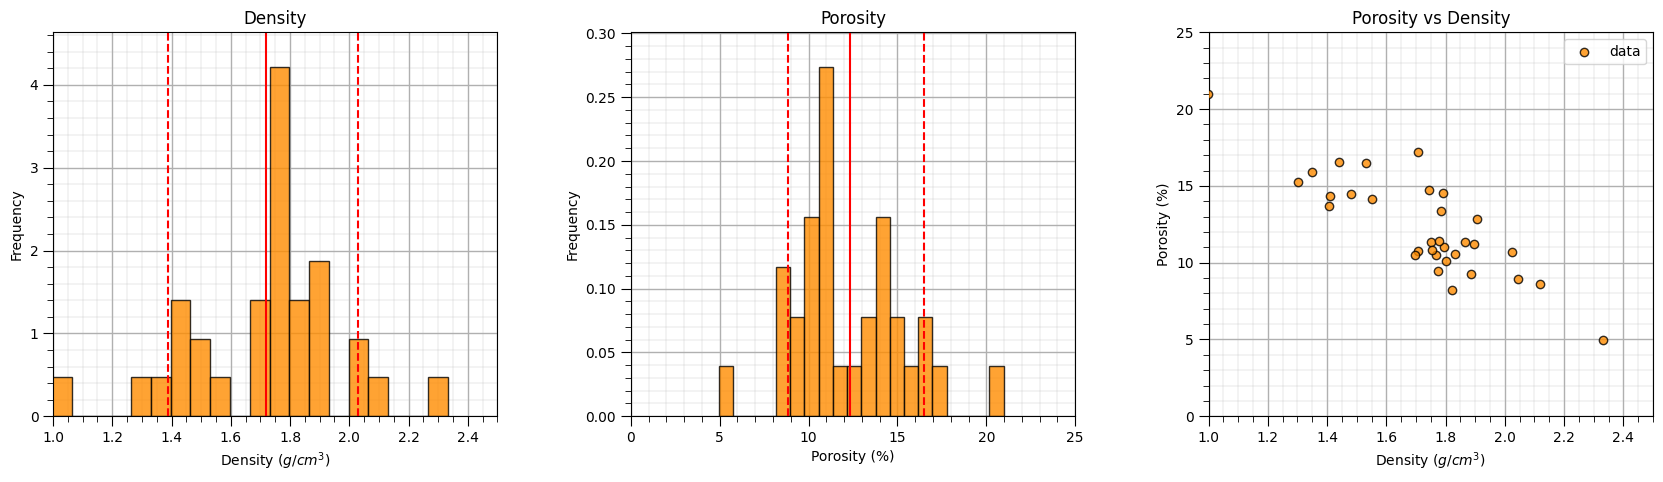

In [8]:
nbins = 20                                                    # number of histogram bins

plt.subplot(131)
freq,_,_ = plt.hist(x=df[xname],weights=None,bins=nbins,alpha = 0.8,edgecolor='black',color='darkorange',density=True)
histogram_bounds(values=df[xname].values,weights=np.ones(len(df)),color='red')
plt.xlabel(xname + ' (' + xunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,freq.max()*1.10]); plt.title('Density'); add_grid()  
plt.xlim([xmin,xmax])    

plt.subplot(132)
freq,_,_ = plt.hist(x=df[yname],weights=None,bins=nbins,alpha = 0.8,edgecolor='black',color='darkorange',density=True)
histogram_bounds(values=df[yname].values,weights=np.ones(len(df)),color='red')
plt.xlabel(yname + ' (' + yunit + ')'); plt.ylabel('Frequency'); plt.ylim([0.0,freq.max()*1.10]); plt.title('Porosity'); add_grid()  
plt.xlim([ymin,ymax])  

plt.subplot(133)                                              # plot the model
plt.scatter(df[xname],df[yname],marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10)
plt.title('Porosity vs Density')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=0.8, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

#### Linear Regression Model

Let's first train a linear regression model to all our data with SciPy package, stats module.

* we will develop more complicated cross validation training and tuning methods latter with training and testing data splits latter. For now all the data is used to train the model.

* recall we imported the module as 'st' above

````python
import scipy.stats as st                                    # statistical methods
````



We instantiate, train the linear regression model and get model diagnostics for confidence intervals and hypothesis testing all in one line of code!

In [9]:
slope, intercept, r_value, p_value, std_err = st.linregress(x,y) # instantiate and fit a linear regression model

print('The model parameters are, slope (b1) = ' + str(round(slope,2)) + ', and the intercept (b0) = ' + str(round(intercept,2)))

The model parameters are, slope (b1) = -10.3, and the intercept (b0) = 30.03


Note that we have 5 outputs when we instantiate and fit our model.

* **slope** - the slope of our linear model, the $b_1$ in the model, $y = b_1 x + b_0$
* **intercept** - the intercept of our linear model, the $b_0$ in the model, $y = b_1 x + b_0$
* **r_value** - the Pearson correlation, the square is the $r^2$, the variance explained
* **p_value** - the p-value for the hypothesis test for the slope of the model of zero
* **stderr** - the standard error of the slope parameter, $SE_{b_1}$

Let's plot the data and the model, to get out estimates we substitute our predictor feature values into our model.

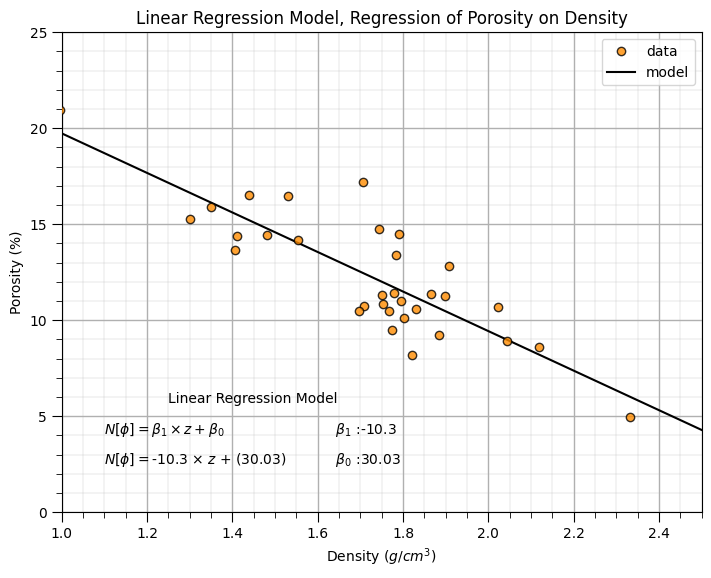

In [17]:
x_values = np.linspace(xmin,xmax,100)                         # return an array of density values 
y_model = slope * x_values + intercept                        # apply our linear regression model to estimate at the training data values

plt.subplot(111)                                              # plot the model
plt.plot(x, y, 'o', label='data', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black',zorder=10)
plt.plot(x_values, y_model, label='model', color = 'black',zorder=1)
plt.title('Linear Regression Model, Regression of ' + yname + ' on ' + xname)
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])

plt.annotate('Linear Regression Model',[1.25,5.7])
plt.annotate(r'    $\beta_1$ :' + str(round(slope,2)),[1.6,4.1])
plt.annotate(r'    $\beta_0$ :' + str(round(intercept,2)),[1.6,2.5])
plt.annotate(r'$N[\phi] = \beta_1 \times z + \beta_0$',[1.1,4.1])
plt.annotate(r'$N[\phi] = $' + str(round(slope,2)) + r' $\times$ $z$ + (' + str(round(intercept,2)) + ')',[1.1,2.5])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The model looks reasonable. Let's go beyond occular inspection.

#### Model Checking with Hypothesis Testing and $r^2$ Values

Let's test the slope with the following hypothesis test:

\begin{equation}
H_0: b_{1} = 0.0
\end{equation}

\begin{equation}
H_1: b_{1} \ne 0.0
\end{equation}

and see if we can reject this hypothesis, $H_{0}$ , that the slope parameter is equal to 0.0.  If we reject this null hypothesis, we show that the slope is meaningful, there is a linear relationship between density and porosity that we can use.

Fortunately, the $linregress$ function from the $stats$ package provides us with the two sided p-value for this test.  

In [14]:
print('Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = ' + str(p_value) + '.')      

Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero = 2.2197132981703346e-09.


Since the p-value is less than any reasonable $\alpha$ value, we reject the null hypothesis and adopt the alternative hypothesis, $H_1$, that the slope is not equal to 0.0.

We can also perform the entire hypothesis test by calculating the,

$$
t_{statistic} = \frac{b_1}{SE_{b_1}} 
$$

First we need the $t_{critical}$ value, given $\alpha$ and $df = n-2$.

In [15]:
alpha = 0.05
t_critical = st.t.ppf([alpha/2,1-alpha/2], df=len(x)-2)
print('The t-critical lower and upper values are ' + str(np.round(t_critical,2)))
print('and the t-statistic is ' + str(round(slope/std_err,2)))

The t-critical lower and upper values are [-2.04  2.04]
and the t-statistic is -8.4


We see a consistent result with the previous hypothesis test with the p-value, since the $t_{statistic}$ is outside the $t_{critical}$ lower and upper interval, we reject the null hypothesis, $h_0$, that the slope, $b_1$ is equal to 0.0.

We can also observe correlation coefficient, $r$ value, and the $r^2$ value that indicates the proportion of variance that is described for our model. 

In [16]:
print('The correlation coefficient is = ' + str(round(r_value,2)) + ' and the r-squared value = ', str(round(r_value**2,2)))

The correlation coefficient is = -0.84 and the r-squared value =  0.7


#### Confidence Intervals for Model Uncertainty 

Let's calculate the 95% confidence interval for the slope parameter, $b_1$ of our model. We just need our $t_{critical}$ and the standard error in the slope, $SE_{b_1}$.

In [17]:
print('The slope confidence interval is ' + str(round(slope,2)) + ' +/- ' + str(round(t_critical[1] * std_err,2)))
CI_slope = slope + t_critical*std_err
print('The slope P02.5 and P97.5 are ' + str(np.round(CI_slope,2)))

The slope confidence interval is -10.3 +/- 2.5
The slope P02.5 and P97.5 are [-12.8  -7.8]


#### Prediction

Now, let's use this model to make a prediction at all the data locations.  

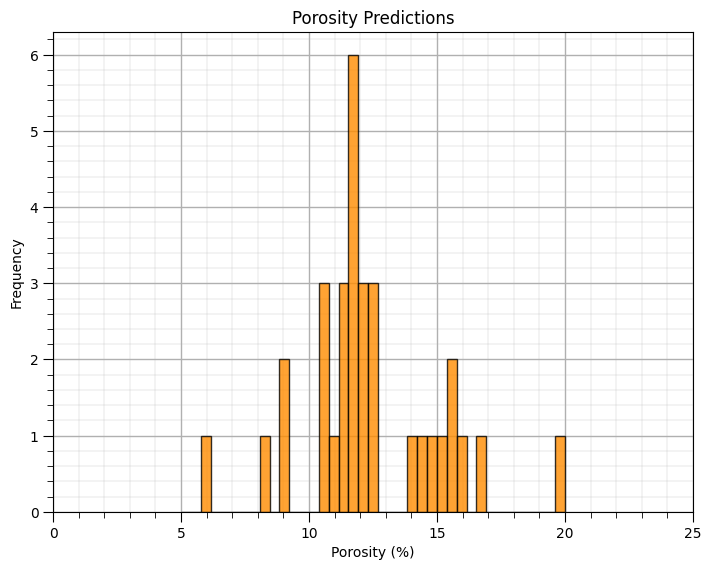

In [18]:
y_hat = slope * x + intercept
plt.subplot(111)
plt.hist(y_hat, color = 'darkorange', alpha = 0.8, edgecolor = 'black', bins = np.linspace(5,20,40))
plt.xlabel(yname + ' (' + yunit + ')'); plt.ylabel('Frequency'); plt.title(yname + ' Predictions'); plt.xlim([ymin,ymax])
add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Checking Prediction Error

It is useful to plot the predictions of porosity with the training porosity vs. density scatter plot. 

* From this plot we can observe the linear limitation of our model
* and get a sense of the unexplained variance $\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2} {n-1}$

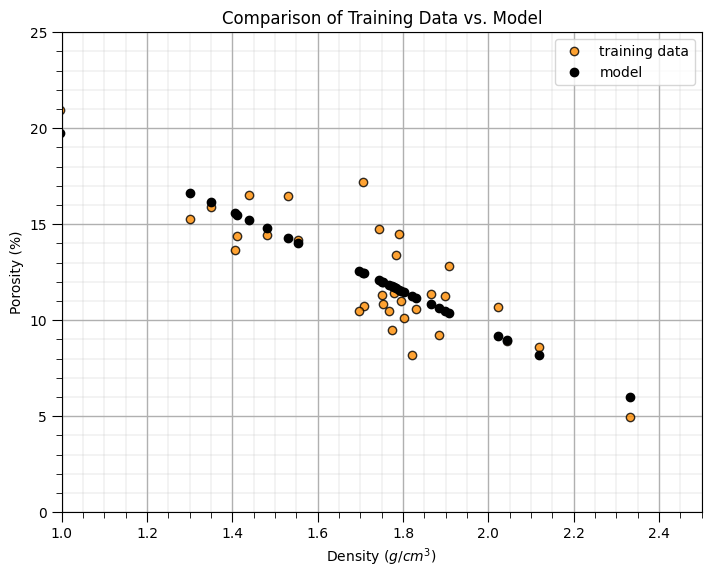

In [19]:
plt.subplot(111)
plt.plot(x, y, 'o', label='training data', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot(x, y_hat, 'o', label='model', color = 'black')
plt.title('Comparison of Training Data vs. Model')
plt.xlabel(xname + ' (' + xunit + ')')
plt.ylabel(yname + ' (' + yunit + ')')
plt.legend(); add_grid(); plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Next let's calculate the error residual,

$$
\Delta y_i = y_i - \hat{y}_i
$$

where $y_i$ are the true response values and $\hat{y}_i$ are the estimated response values. 

It is good to check the error residual distribution that,

* the average is close to 0.0
* the shape is not skewed
* there are no outliers

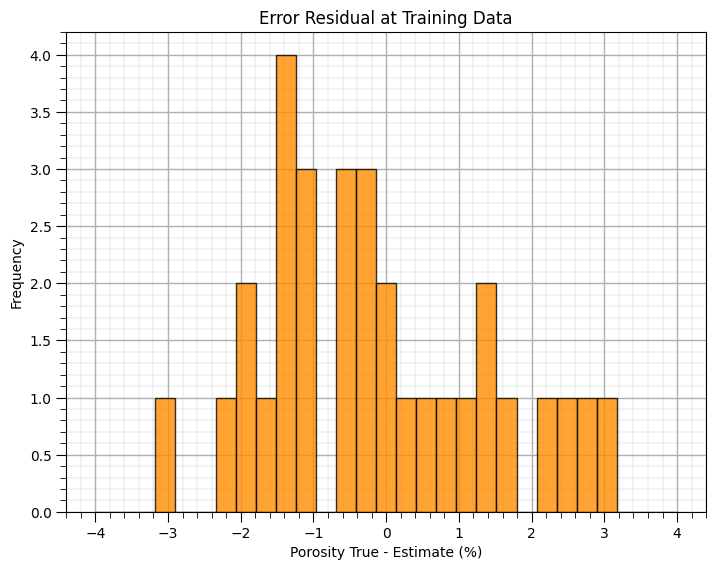

The average of the residuals is 0.0


In [20]:
residual = y - y_hat

plt.subplot(111)
plt.hist(residual, color = 'darkorange', alpha = 0.8, edgecolor = 'black', bins = np.linspace(-4,4,30))
plt.title("Error Residual at Training Data"); plt.xlabel(yname + ' True - Estimate (%)');plt.ylabel('Frequency'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

print('The average of the residuals is ' + str(round(np.mean(residual),2)))

Next we will check the truth vs. estimated scatter plot, and cross validation residual plot, residual vs. the fitted value.  

* with these plots we check if the errors are consistent over the range of fitted values 

* for example, we could use this plot to identify higher error or systematic under- or overestimation over a specific range of fitted values

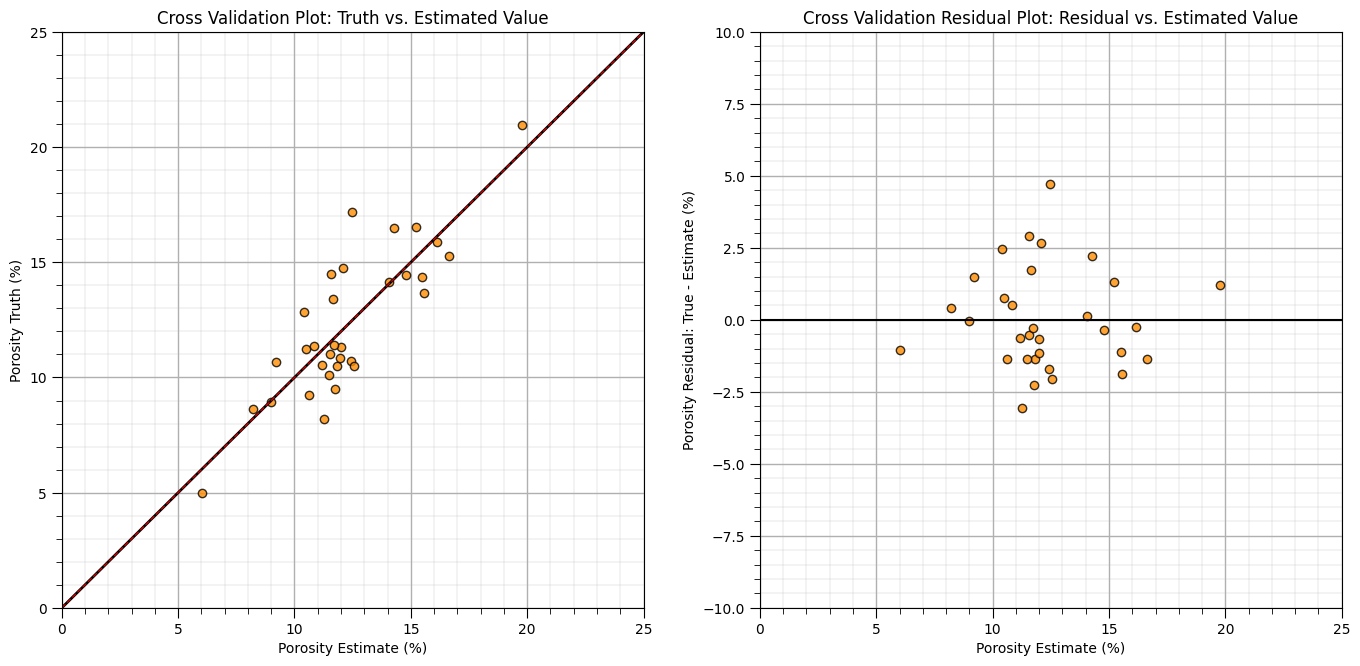

In [21]:
slope_cross, intercept_cross, _, _, _ = st.linregress(y_hat,y) # check for conditional bias with a linear fit to the cross validation plot

plt.subplot(121)
plt.plot(y_hat, y, 'o', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot([ymin,ymax], [ymin,ymax], 'black',lw=2.0)
plt.plot(np.linspace(ymin,ymax,100), slope_cross*np.linspace(ymin,ymax,100)+intercept_cross, 
         alpha = 0.8, color = 'red',ls='--',lw=1.0)
plt.title('Cross Validation Plot: Truth vs. Estimated Value')
plt.xlabel(yname + ' Estimate (%)'); plt.ylabel(yname + ' Truth (%)'); add_grid(); plt.xlim([ymin,ymax]); plt.ylim([ymin,ymax])

plt.subplot(122)
plt.plot(y_hat, residual, 'o', color = 'darkorange', alpha = 0.8, markeredgecolor = 'black')
plt.plot([ymin,ymax], [0,0], 'black')
plt.title('Cross Validation Residual Plot: Residual vs. Estimated Value')
plt.xlabel(yname + ' Estimate (%)'); plt.ylabel(yname + ' Residual: True - Estimate (%)'); add_grid()
plt.xlim([ymin,ymax]); plt.ylim([-10,10])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

For the demonstration case, there is no apparent conditional bias in the estimates over the range of values.

#### Comments

I hope you found this tutorial useful. I'm always happy to discuss geostatistics, statistical modeling, uncertainty modeling and machine learning,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig) | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  